###  선형회귀  
간단산 선형회귀를 실습해보아요  
이 실습을 통해 무엇을 얻는다. 목적이 뭔가?   
아 이걸 이렇게 사용하는 군요. 별거 아닌네요  

In [ ]:
미션이 뭔가요?
# 키와 몸무게를 저장하고 있다.
아이스크림 판매량과 온도와와 관계를 알고 싶다.
내일 예상온도가 얼마이니 내일 판매량은 이럴 것인다. 


## data 
height_weight

In [107]:
# import numpy as np


In [108]:
# import pandas as pd

In [109]:
# pd.read_excel?

In [111]:
import pandas as pd
df = pd.read_excel('height_weight.xlsx', sheet_name=0)
df
# 나이별 키와 몸무게를 저장하고 있다.

,age,height,weight
0,0~3개월,59.1,5.9
1,3~6개월,66.7,8.0
2,6~9개월,71.4,8.9
3,9~12개월,75.0,10.1
4,12~18개월,80.1,10.9
5,2세,87.8,13.2
6,3세,95.2,14.8
7,4세,102.3,16.7
8,5세,109.0,19.1
9,6세,115.5,21.5


In [112]:
df.describe()

,height,weight
count,31.000000,31.000000
mean,135.800000,42.616129
std,38.707415,24.601790
min,59.100000,5.900000
25%,105.650000,17.900000
50%,150.700000,45.200000
75%,169.750000,66.650000
max,173.800000,72.300000


In [113]:
tt = df.weight.value_counts()
# df.iloc[:,-1].value_counts()
type(tt)

pandas.core.series.Series

In [114]:
tt[::5] # 몸무게별 카운트다. 이것이 무슨 의미가 있냐?
# 왜 이걸 체크했냐?

63.4    1
51.0    1
10.9    1
67.4    1
69.1    1
65.9    1
8.0     1
Name: weight, dtype: int64

In [115]:
pd.set_option('display.max_rows', 1000)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     31 non-null     object 
 1   height  31 non-null     float64
 2   weight  31 non-null     float64
dtypes: float64(2), object(1)
memory usage: 872.0+ bytes


In [117]:
from sklearn import model_selection
from sklearn import metrics

In [118]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [119]:
dataset = df.values

In [120]:
type(dataset)

numpy.ndarray

### numpy.ndarray 에 대해 간단히 알아 보아요
http://taewan.kim/post/numpy_cheat_sheet/

In [121]:
dataset.shape # 행, 열

(31, 3)

In [122]:
dataset.ndim # dataframe 스타일이 2차원이다.

2

In [74]:
dataset #칼럼 이름 없는 테이블(표)라고 생각하면 된다.

array([['0~3개월', 59.1, 5.9],
       ['3~6개월', 66.7, 8.0],
       ['6~9개월', 71.4, 8.9],
       ['9~12개월', 75.0, 10.1],
       ['12~18개월', 80.1, 10.9],
       ['2세', 87.8, 13.2],
       ['3세', 95.2, 14.8],
       ['4세', 102.3, 16.7],
       ['5세', 109.0, 19.1],
       ['6세', 115.5, 21.5],
       ['7세', 122.0, 24.9],
       ['8세', 127.8, 28.5],
       ['9세', 133.3, 32.3],
       ['10세', 138.0, 35.4],
       ['11세', 144.9, 41.5],
       ['12세', 150.7, 45.2],
       ['13세', 158.2, 51.0],
       ['14세', 164.7, 57.1],
       ['15세', 169.2, 61.7],
       ['16세', 170.3, 63.4],
       ['17세', 172.5, 65.2],
       ['18세', 172.9, 67.4],
       ['19세', 173.4, 68.3],
       ['20~24세', 173.8, 69.5],
       ['25~29세', 172.5, 70.1],
       ['30~34세', 171.3, 71.5],
       ['35~39세', 170.7, 72.3],
       ['40~49세', 168.6, 70.6],
       ['50~59세', 166.1, 69.1],
       ['60~69세', 164.4, 65.9],
       ['70세이상', 162.4, 61.1]], dtype=object)

In [16]:
df.head()

,age,height,weight
0,0~3개월,59.1,5.9
1,3~6개월,66.7,8.0
2,6~9개월,71.4,8.9
3,9~12개월,75.0,10.1
4,12~18개월,80.1,10.9


In [18]:
X = dataset[:,1:2] # 행, 열
X[:5]

array([[59.1],
       [66.7],
       [71.4],
       [75.0],
       [80.1]], dtype=object)

In [31]:
y = dataset[:,2]
y
#df.iloc[:,-1].value_counts()

array([5.9, 8.0, 8.9, 10.1, 10.9, 13.2, 14.8, 16.7, 19.1, 21.5, 24.9,
       28.5, 32.3, 35.4, 41.5, 45.2, 51.0, 57.1, 61.7, 63.4, 65.2, 67.4,
       68.3, 69.5, 70.1, 71.5, 72.3, 70.6, 69.1, 65.9, 61.1], dtype=object)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
#print(x_data.shape) #(506, 13)
#print(y_data.shape) #(506,)

In [34]:
estimator = LinearRegression()
estimator.fit(X_train, y_train)

LinearRegression()

### train data로 예측해보기
어떤 의미가 있는가?   
학습한 데이터로 평가해보자. 음...   
답을 다 가르쳐 졌으니???  

In [35]:
y_predict = estimator.predict(X_train) 
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

0.9359533804315145


### 기울기, 절편

In [38]:
#기울기 coef_
estimator.coef_

array([0.63283252])

In [39]:
# 절편
estimator.intercept_

-43.03901872573948

In [81]:
df.tail()

,age,height,weight
26,35~39세,170.7,72.3
27,40~49세,168.6,70.6
28,50~59세,166.1,69.1
29,60~69세,164.4,65.9
30,70세이상,162.4,61.1


### 173 cm 인 사람의 몸무게는 얼마니?

In [84]:
# y=wx+b
my_height= 173
0.63*my_height - 43.03

65.96

### test

In [36]:
y_predict = estimator.predict(X_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) # 0.92

0.9299994716441901


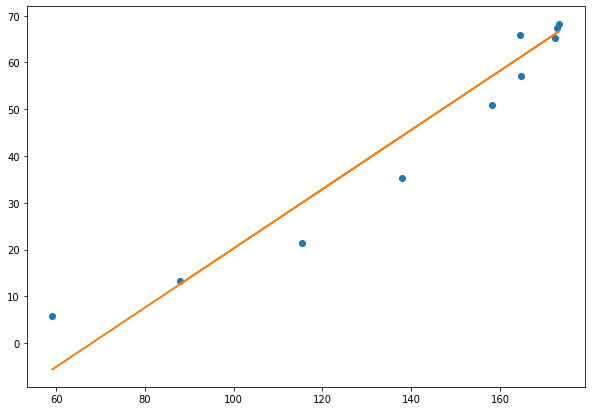

In [101]:
fig = plt.figure(figsize=(10,7))
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, estimator.predict(X_test))
plt.show()

## plot

In [102]:
import matplotlib.pyplot as plt

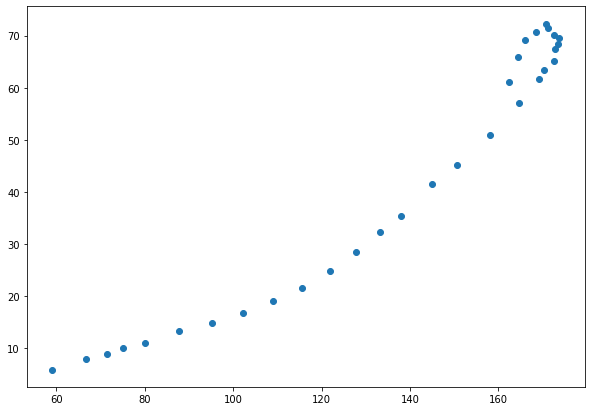

In [103]:
fig = plt.figure(figsize=(10, 7))
plt.plot(X, y, 'o')
plt.show()

In [45]:
pred = estimator.predict(X)
pred

array([-5.63861701, -0.82908988,  2.14522295,  4.42342   ,  7.65086584,
       12.52367621, 17.20663684, 21.6997477 , 25.93972556, 30.05313692,
       34.16654828, 37.83697687, 41.31755571, 44.29186854, 48.6584129 ,
       52.3288415 , 57.07508537, 61.18849673, 64.03624305, 64.73235882,
       66.12459035, 66.37772336, 66.69413962, 66.94727263, 66.12459035,
       65.36519133, 64.98549182, 63.65654354, 62.07446225, 60.99864697,
       59.73298194])

In [53]:
pred.shape

(31,)

In [52]:
X.shape

(31, 1)

http://hleecaster.com/ml-linear-regression-example/

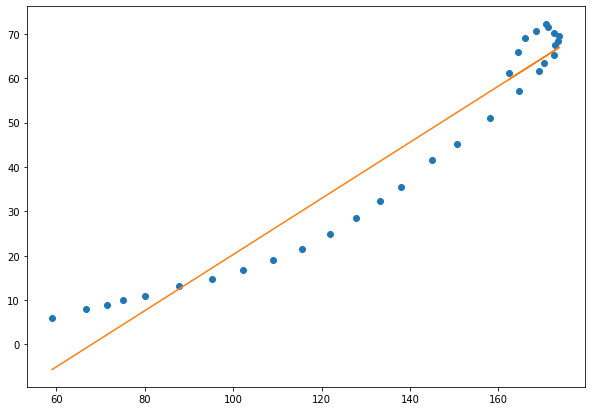

In [94]:
fig = plt.figure(figsize=(10,7))
plt.plot(X, y, 'o')
plt.plot(X, estimator.predict(X))
#plt.plot(X,estimator.predict(X.values.reshape(-1,1)))
plt.show()